In [1]:
import numpy as np
from PIL import Image
import cv2 as cv
import matplotlib.pyplot as plt

path = './UCSD_Anomaly_Dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train/Train016'

im = Image.open(path + '/150.tif')
im = np.array(im)

gamma = 1.8

lookUpTable = np.empty((1,256), np.uint8)
for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
res = cv.LUT(im, lookUpTable)

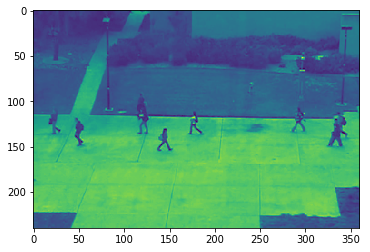

In [2]:
plt.imshow(im)

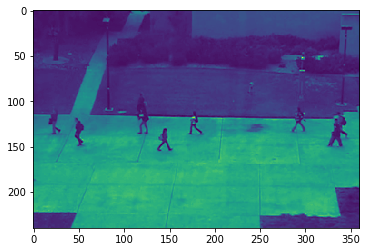

In [3]:
plt.imshow(res)

In [4]:
import numpy as np
from PIL import Image
import cv2 as cv
import matplotlib.pyplot as plt
import glob
import scipy.misc
import os

gamma_list = [0.3, 0.6, 0.9, 1.2, 1.5, 1.8]

for gamma in gamma_list:
    
    print(gamma)
    
    # Train image
    source_path = './UCSD_Anomaly_Dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Train'
    file_list = glob.glob(source_path + '/*/*')
    basic_path = './UCSD_Anomaly_Dataset_processing/Train'+ '_' + str(gamma)
    
    for file in file_list:
        
        file_split = file.split('/')
        
        detailed_path = basic_path + '/' + file_split[-2]
        
        # make dir
        if not(os.path.isdir(detailed_path)):
            os.makedirs(os.path.join(detailed_path))
        
        # open image
        im = Image.open(file)
        im = np.array(im)
        
        # gamma encoding
        lookUpTable = np.empty((1,256), np.uint8)
        for i in range(256):
            lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
        res = cv.LUT(im, lookUpTable)
        
        # save image
        scipy.misc.imsave(detailed_path + '/' + file_split[-1], res)
        
    # Test image
    source_path = './UCSD_Anomaly_Dataset/UCSD_Anomaly_Dataset.v1p2/UCSDped2/Test'
    file_list = glob.glob(path + '/*/*')
    basic_path = './UCSD_Anomaly_Dataset_processing/Test'+ '_' + str(gamma)
    
    for file in file_list:
        
        file_split = file.split('/')
        
        detailed_path = basic_path + '/' + file_split[-2]
        
        # make dir
        if not(os.path.isdir(detailed_path)):
            os.makedirs(os.path.join(detailed_path))
        
        # open image
        im = Image.open(file)
        im = np.array(im)

        # gamma encoding
        lookUpTable = np.empty((1,256), np.uint8)
        for i in range(256):
            lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
        res = cv.LUT(im, lookUpTable)
        
        # save image
        scipy.misc.imsave(detailed_path + '/' + file_split[-1], res)

0.3


/home/taeyong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:41: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


0.6
0.9
1.2
1.5
1.8
